In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
from google.colab import  files
uploaded = files.upload()

Saving DS_PVT_ID_NUMBER_BASE_01_DESCRIBE_03.xlsx to DS_PVT_ID_NUMBER_BASE_01_DESCRIBE_03.xlsx


In [25]:
df = pd.read_excel(open('DS_PVT_ID_NUMBER_BASE_01_DESCRIBE_03.xlsx', 'rb'))

In [26]:
df.head()

,ID_Number,PVT,Local,Ascites_simple,EVL_simple,PH_dur_simple,Age,HB,PLT,ALB,TB,INR,Spl_lenth,PV_diam
0,Control_ 726_02,0,0,0,0,1,36,114.0,230,40.0,0.7,1.15,10.7,11.6
1,Case_002,1,0,1,0,0,57,122.0,171,29.3,3.5,1.60,12.6,14.0
2,Case_005,1,0,1,0,0,55,134.0,63,34.2,1.3,1.41,14.0,12.2
3,Case_006,1,0,1,1,0,62,111.0,105,27.0,1.9,1.46,14.7,15.0
4,Case_001,1,0,0,0,0,56,118.0,137,22.0,1.7,1.25,14.8,12.6


In [27]:
df.shape

(841, 14)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 841 entries, 0 to 840
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID_Number       841 non-null    object 
 1   PVT             841 non-null    int64  
 2   Local           841 non-null    int64  
 3   Ascites_simple  841 non-null    int64  
 4   EVL_simple      841 non-null    int64  
 5   PH_dur_simple   841 non-null    int64  
 6   Age             841 non-null    int64  
 7   HB              841 non-null    float64
 8   PLT             841 non-null    int64  
 9   ALB             841 non-null    float64
 10  TB              841 non-null    float64
 11  INR             841 non-null    float64
 12  Spl_lenth       841 non-null    float64
 13  PV_diam         841 non-null    float64
dtypes: float64(6), int64(7), object(1)
memory usage: 92.1+ KB


In [29]:
df = df.drop('ID_Number', axis = 1) # удаляем столбец с идентификационными данными

In [30]:
# описываем данные: датасет разбалансирован исход 1 = 133 наблюдения, исход 0 - 708
df['PVT'].value_counts()

0    708
1    133
Name: PVT, dtype: int64

In [31]:
df.describe()

,PVT,Local,Ascites_simple,EVL_simple,PH_dur_simple,Age,HB,PLT,ALB,TB,INR,Spl_lenth,PV_diam
count,841.000000,841.00000,841.000000,841.000000,841.000000,841.000000,841.000000,841.000000,841.000000,841.000000,841.000000,841.000000,841.000000
mean,0.158145,0.08799,0.405470,0.140309,0.186683,52.726516,120.514388,118.856124,32.911653,2.482164,1.237681,14.927943,12.483234
std,0.365094,0.28345,0.491275,0.347514,0.389888,12.585191,21.590186,69.733435,6.848434,1.955667,0.210543,2.695109,1.954425
min,0.000000,0.00000,0.000000,0.000000,0.000000,18.000000,37.000000,15.000000,12.000000,0.200000,0.810000,7.100000,7.500000
25%,0.000000,0.00000,0.000000,0.000000,0.000000,45.000000,108.000000,68.000000,28.100000,1.100000,1.080000,13.000000,11.000000
50%,0.000000,0.00000,0.000000,0.000000,0.000000,54.000000,121.100000,100.000000,33.000000,1.800000,1.180000,14.800000,12.400000
75%,0.000000,0.00000,1.000000,0.000000,0.000000,61.000000,135.300000,150.000000,38.000000,3.000000,1.330000,16.500000,13.600000
max,1.000000,1.00000,1.000000,1.000000,1.000000,85.000000,179.000000,325.000000,52.000000,8.300000,1.830000,22.600000,18.300000


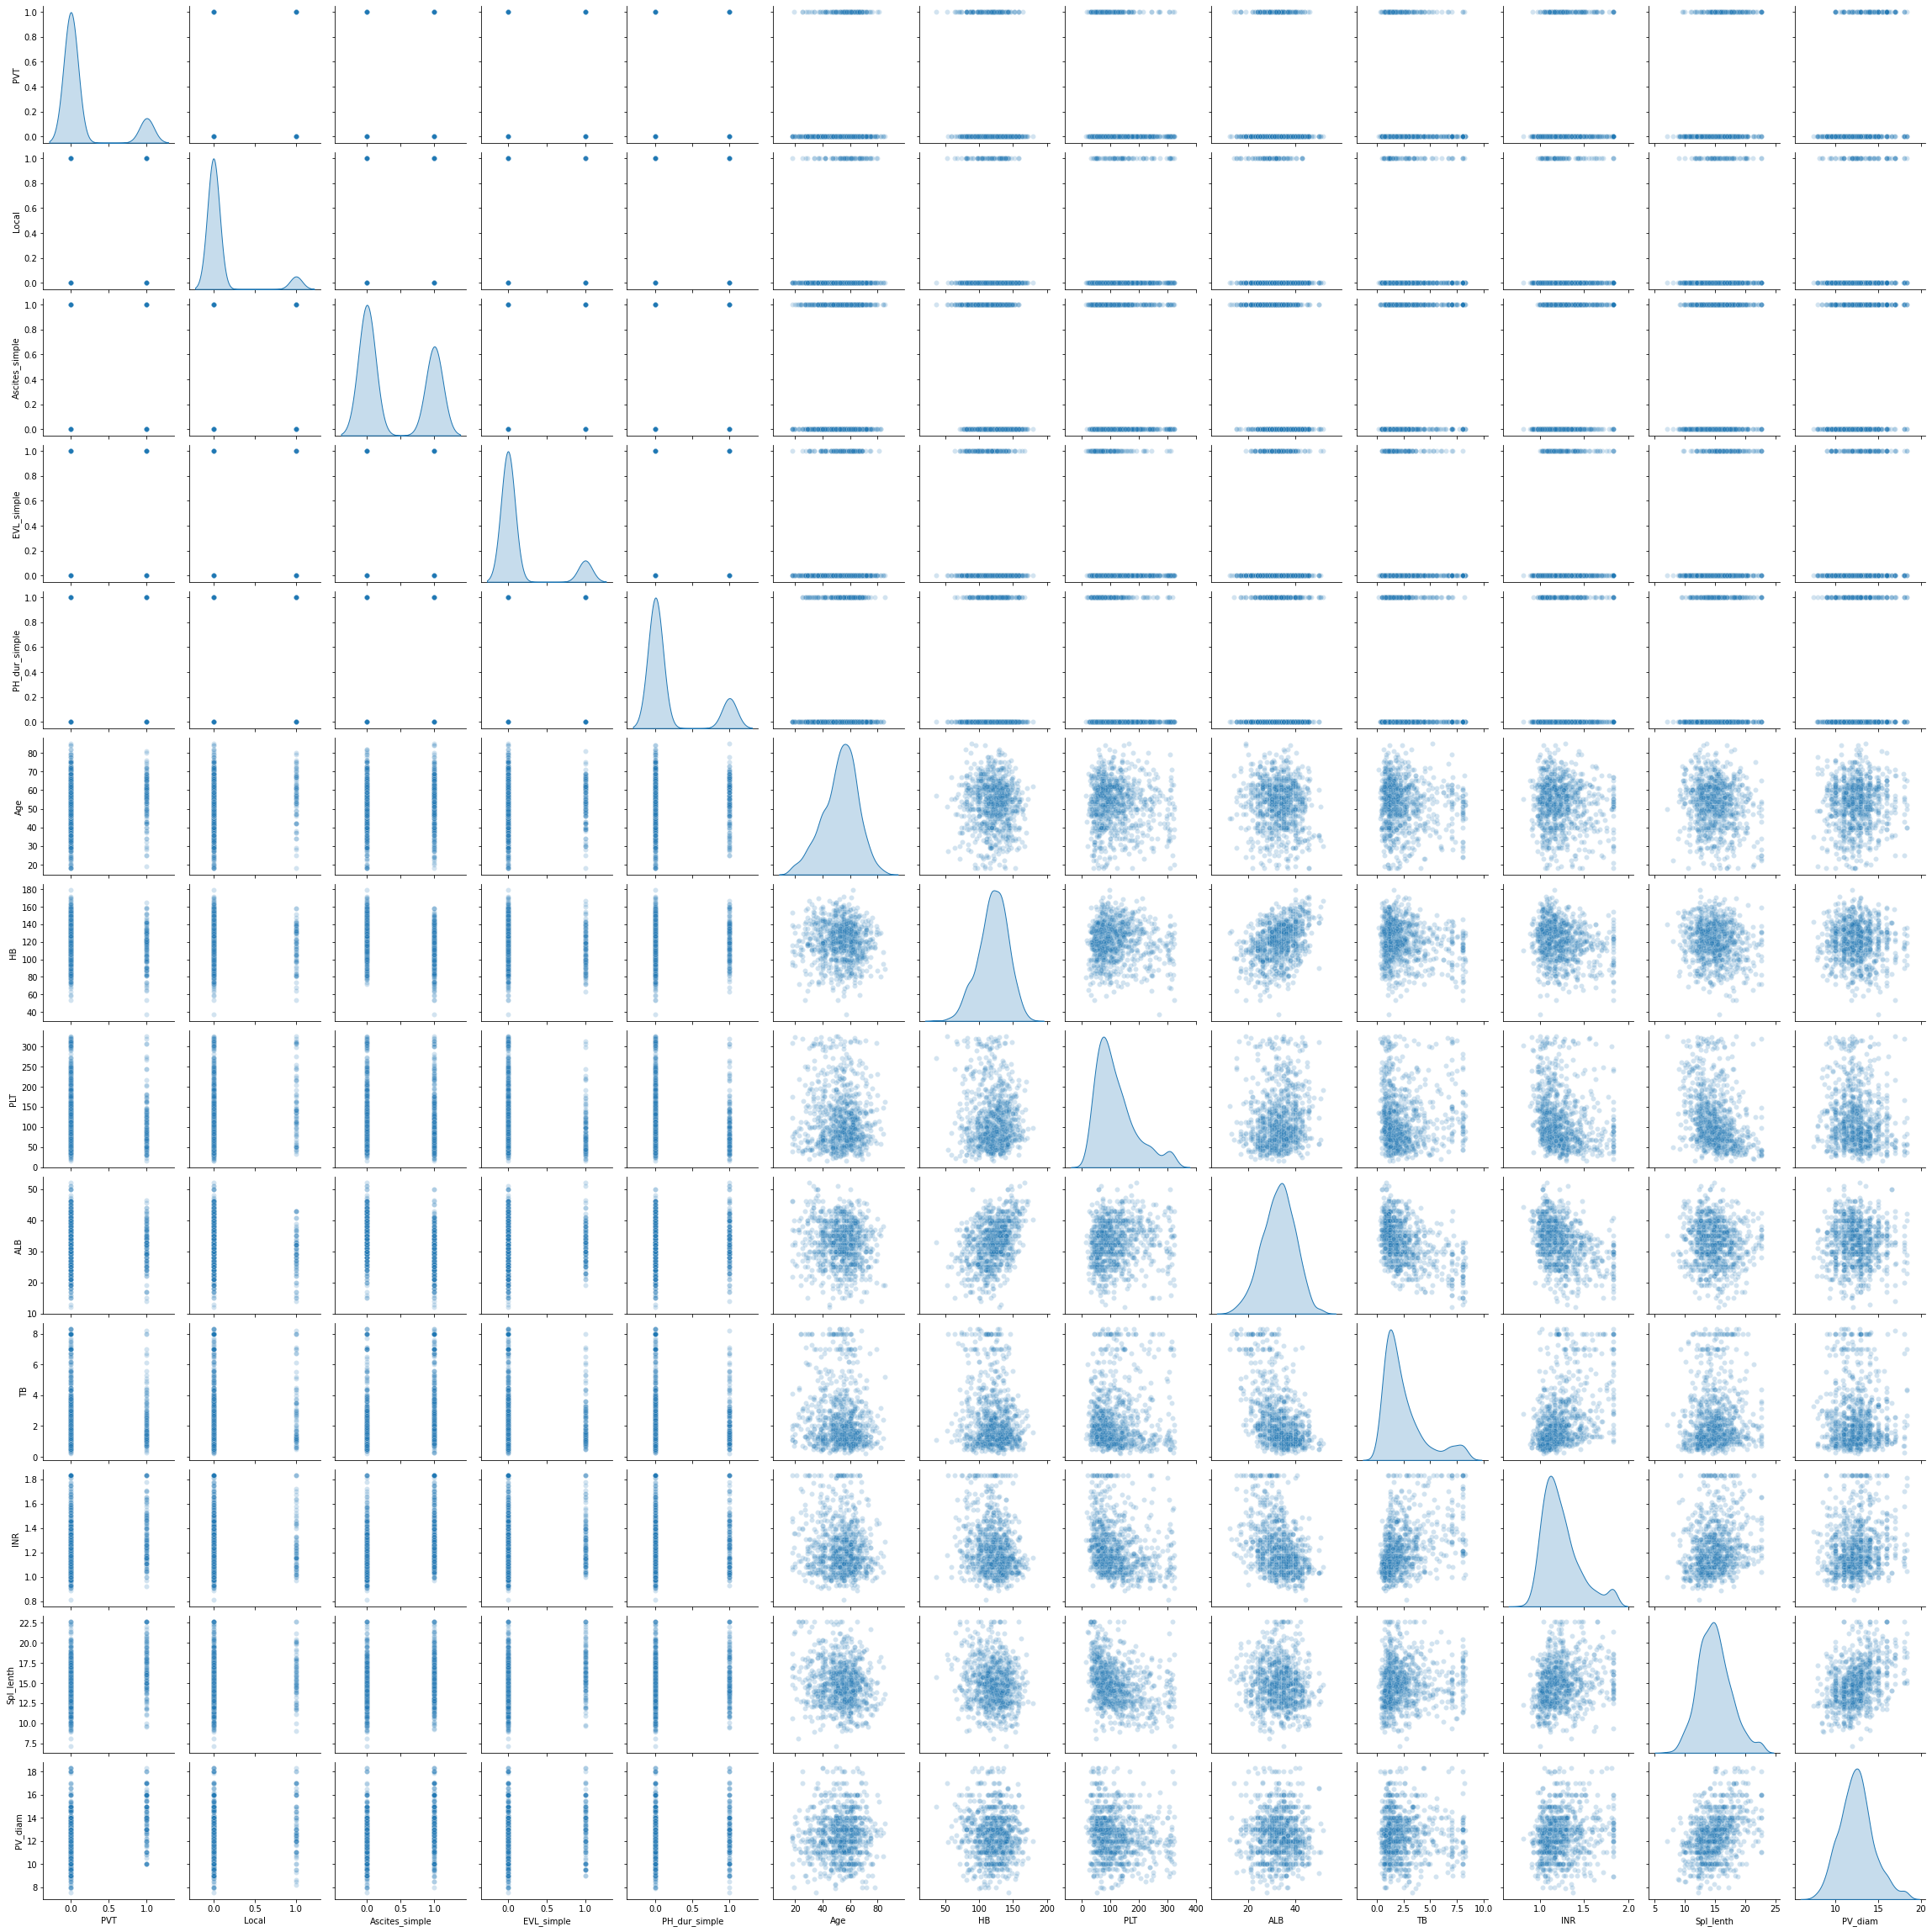

In [32]:
sns.pairplot(df, diag_kind='kde', plot_kws={'alpha': 0.2})

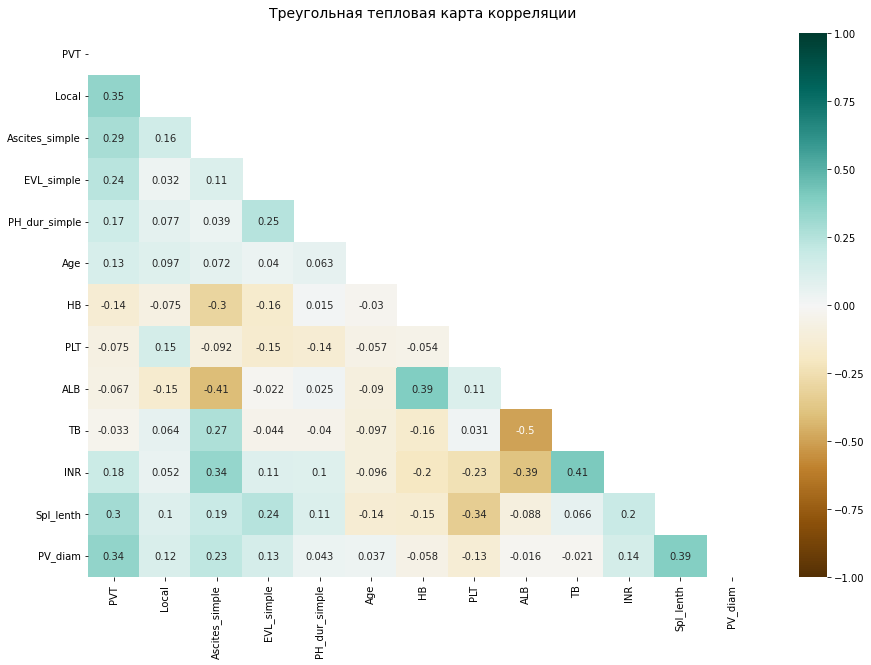

In [33]:
plt.figure(figsize=(15, 10)) 
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool_)) 
heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG') 
heatmap.set_title('Треугольная тепловая карта корреляции', fontdict={'fontsize':14}, pad=16);

# Нормализуем данные

In [34]:
# НОРМАЛИЗАЦИЯ
# импротируем библиотеки
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler

In [35]:
#нормализуем необходимые столбцы
from sklearn.preprocessing import MinMaxScaler
minmax_scaler = MinMaxScaler()
column_names_to_normalize = ['Age', 'HB', 'PLT', 'ALB', 'TB', 'INR', 'Spl_lenth', 'PV_diam']
x = df[column_names_to_normalize].values
x_scaled = minmax_scaler.fit_transform(x)
df_temp = pd.DataFrame(x_scaled, columns = column_names_to_normalize, index = df.index)
df[column_names_to_normalize] = df_temp

In [36]:
df.describe()

,PVT,Local,Ascites_simple,EVL_simple,PH_dur_simple,Age,HB,PLT,ALB,TB,INR,Spl_lenth,PV_diam
count,841.000000,841.00000,841.000000,841.000000,841.000000,841.000000,841.000000,841.000000,841.000000,841.000000,841.000000,841.000000,841.000000
mean,0.158145,0.08799,0.405470,0.140309,0.186683,0.518306,0.588129,0.335020,0.522791,0.281749,0.419295,0.505029,0.461411
std,0.365094,0.28345,0.491275,0.347514,0.389888,0.187839,0.152044,0.224947,0.171211,0.241440,0.206415,0.173878,0.180965
min,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.00000,0.000000,0.000000,0.000000,0.402985,0.500000,0.170968,0.402500,0.111111,0.264706,0.380645,0.324074
50%,0.000000,0.00000,0.000000,0.000000,0.000000,0.537313,0.592254,0.274194,0.525000,0.197531,0.362745,0.496774,0.453704
75%,0.000000,0.00000,1.000000,0.000000,0.000000,0.641791,0.692254,0.435484,0.650000,0.345679,0.509804,0.606452,0.564815
max,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


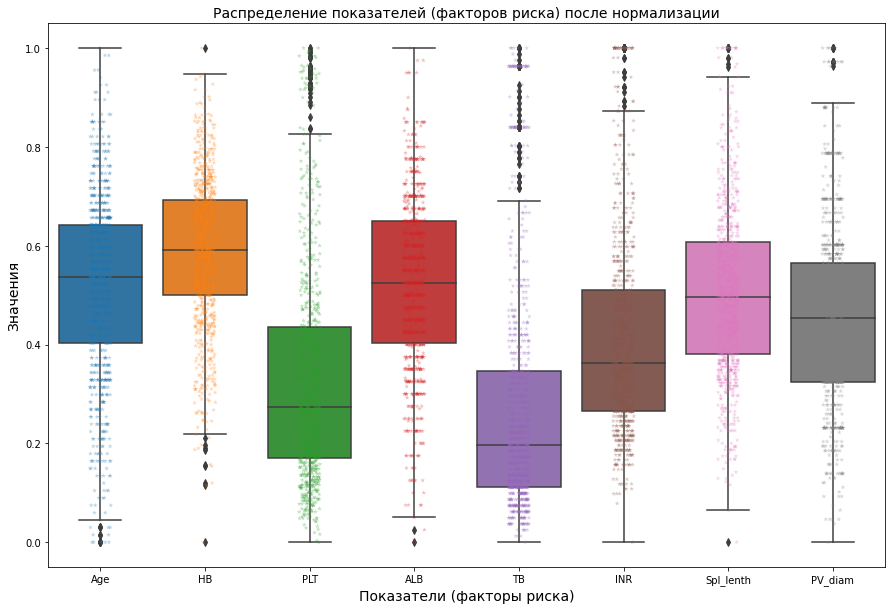

In [37]:
df_1 = pd.DataFrame(data=df, columns=['Age', 'HB', 'PLT', 'ALB', 'TB', 'INR', 'Spl_lenth', 'PV_diam'])
plt.figure(figsize=(15, 10))
boxplot = sns.boxplot(x="variable", y="value", data=pd.melt(df), order=['Age', 'HB', 'PLT', 'ALB', 'TB', 'INR', 'Spl_lenth', 'PV_diam'])
boxplot = sns.stripplot(x="variable", y="value", data=pd.melt(df), marker="*", alpha=0.3, cmap='BrBG', order=['Age', 'HB', 'PLT', 'ALB', 'TB', 'INR', 'Spl_lenth', 'PV_diam'])
boxplot.axes.set_title("Распределение показателей (факторов риска) после нормализации", fontsize=14)
boxplot.set_xlabel("Показатели (факторы риска)", fontsize=14)
boxplot.set_ylabel("Значения", fontsize=14);